In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [10]:
# reconnaissance de chiffres

# aperçu des données
df = pd.read_csv("train.csv")
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
df.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [13]:
print(df["label"].nunique())  # je veux connaître le nombre d'entrées différentes dans label pour avoir le bon nombre de clusters

10


In [14]:
# pas de NaN
# 10 labels différents ( = 10 chiffres) : target

In [15]:
# essai juste avec le jeu de données train
# comme il y a beaucoup d'entrée et que le temps de calcul va être long, je divise par 10 le nombre de données pour l'essai
df2 = df.iloc[:4200,:]
target = df2["label"]
features = df2.drop("label", axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3150, 784) (1050, 784) (3150,) (1050,)


In [16]:
# recherche des meilleurs hyperparamètres - fonction
from sklearn.model_selection import GridSearchCV

def find_best_params(model, params, X, y):
    grid_model = GridSearchCV(estimator = model, param_grid = params)
    grid_model.fit(X, y)
    return print("les meilleurs paramètres pour {Model} sont :".format(Model = model), grid_model.best_params_)

In [17]:
# on cherche les meilleurs hyperparamètres de KNN
from sklearn.neighbors import KNeighborsClassifier

find_best_params(model = KNeighborsClassifier(n_neighbors = 10),  # correspond au nombre d'entrées uniques de label ref ci dessus
                    params = {"metric":["minkowski", "euclidean", "manhattan", "chebyshev"]},
                    X = X_train,
                    y = y_train)

les meilleurs paramètres pour KNeighborsClassifier(n_neighbors=10) sont : {'metric': 'minkowski'}


In [18]:
# on cherche les meilleurs hyperparamètres de SVM
from sklearn.svm import SVC

find_best_params(model = SVC(random_state = 123),  
                    params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"]},
                    X = X_train,
                    y = y_train)

les meilleurs paramètres pour SVC(random_state=123) sont : {'kernel': 'rbf'}


KNeighborsClassifier(n_neighbors=10) 
 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       104
           1       0.81      0.99      0.89       118
           2       0.97      0.89      0.93       124
           3       0.92      0.91      0.92        93
           4       0.96      0.88      0.92       103
           5       0.91      0.96      0.93       104
           6       0.94      0.99      0.96       105
           7       0.92      0.87      0.89       105
           8       0.94      0.73      0.82       103
           9       0.79      0.87      0.83        91

    accuracy                           0.91      1050
   macro avg       0.91      0.90      0.90      1050
weighted avg       0.91      0.91      0.91      1050



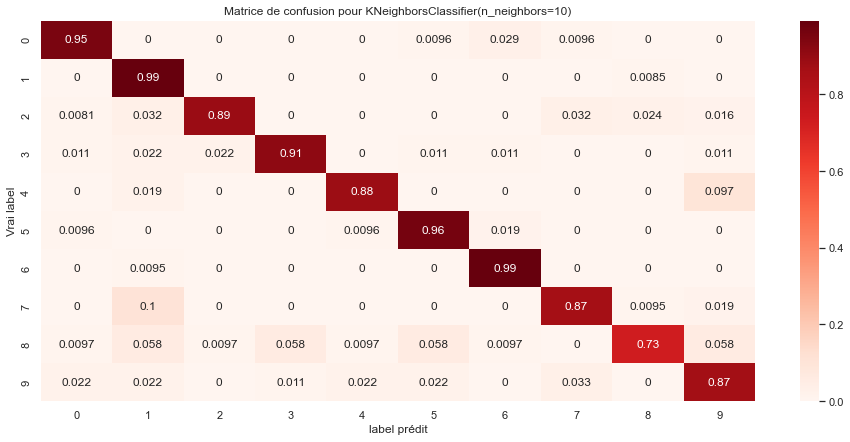

SVC(random_state=123) 
 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       104
           1       0.95      0.99      0.97       118
           2       0.94      0.94      0.94       124
           3       0.94      0.94      0.94        93
           4       0.95      0.96      0.96       103
           5       0.95      0.97      0.96       104
           6       0.97      0.98      0.98       105
           7       0.96      0.91      0.94       105
           8       0.91      0.87      0.89       103
           9       0.89      0.90      0.90        91

    accuracy                           0.95      1050
   macro avg       0.94      0.94      0.94      1050
weighted avg       0.95      0.95      0.95      1050



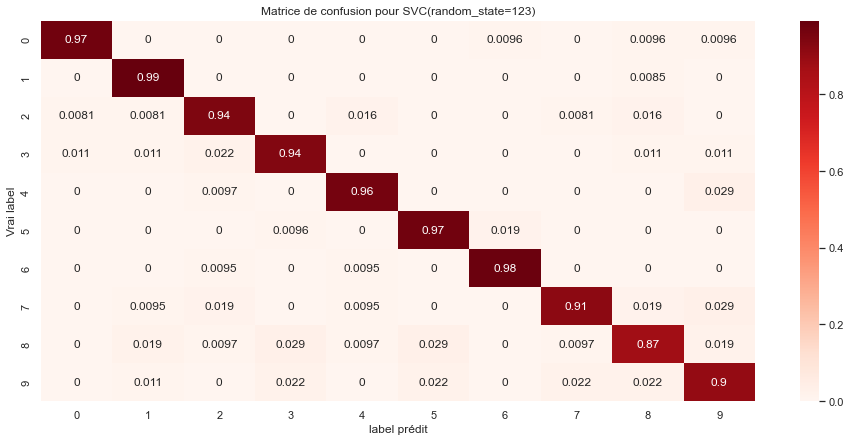

AdaBoostClassifier(random_state=123) 
 
               precision    recall  f1-score   support

           0       0.30      0.64      0.41       104
           1       0.75      0.85      0.80       118
           2       0.50      0.46      0.48       124
           3       0.31      0.12      0.17        93
           4       0.26      0.42      0.32       103
           5       0.55      0.38      0.45       104
           6       0.55      0.17      0.26       105
           7       0.65      0.72      0.68       105
           8       0.66      0.51      0.58       103
           9       0.41      0.34      0.37        91

    accuracy                           0.47      1050
   macro avg       0.49      0.46      0.45      1050
weighted avg       0.50      0.47      0.46      1050



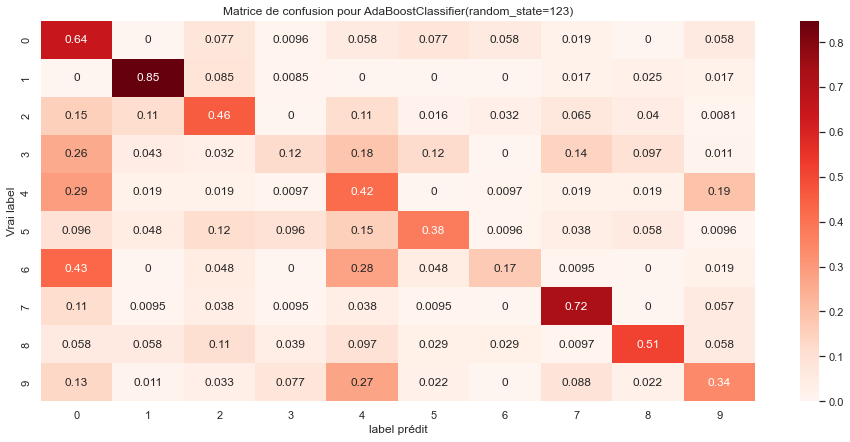

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# on récupère nos modèles avec les meilleurs hyperparamètres trouvés précédemment
knn = KNeighborsClassifier(n_neighbors = 10, metric = "minkowski")
svm = SVC(kernel = "rbf", random_state = 123)
# et j'essaie Adaboost (avec decision tree comme base_estimator par défaut)
abc = AdaBoostClassifier(random_state = 123)

for model in [knn, svm, abc]:
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    print("{} \n \n".format(model), classification_report(y_test, y_pred_model))
    matrix_model = confusion_matrix(y_test, y_pred_model, normalize = "true")

    plt.figure(figsize=(16,7))
    sns.heatmap(matrix_model, annot=True, cmap=plt.cm.Reds)

    plt.xlabel("label prédit")
    plt.ylabel("Vrai label")
    plt.title("Matrice de confusion pour {}".format(model))
    plt.show()


In [24]:
# KNN - résultats

# de façon générale, on obtient de très bons résultats ! (precision > 0.75 rappel > 0.75 f1_score > 0.75 accuracy > 0.75 pour tous les labels)
# on remarque sur la matrice de confusion que KNN a plus de mal à discerner le 8, qu'il confond à part égale avec le 1, le 3, le 5, et le 9
# de plus, les 1 et les 7 sont parfois confondus
# et les 4 avec les 9

# SVM - résultats

# excellents aussi, et meilleurs que KNN !
# toujours un peu plus compliqué sur le 8 (de temps en temps confondu avec le 3 et le 5)
# precision/rappel/f1_score/accuracy > 0.85

# ADABOOST - résultats

# nettement moins bons que pour KNN et SVM, peut-être est-ce dû à l'estimateur de base ? (decision tree)
# seul le 1 est bien reconnu
# très mauvais résultats sur le 3 et le 6
# de façon plus précise, pour les 0, 4, 7, la précision est plus basse que le rappel ce qui signifie que pour ces chiffre, adaboost a du mal à
# sélectionner la bonne classe et va utiliser des observations d'autres labels pour faire ses prédictions
# pour les autres chiffre, la précision est plus haute que le rappel et donc adaboost a juste du mal à sélectionner la bonne classe, en revanche,
# l'algorithme n'inclus pas d'observations d'autres labels

In [25]:
# Je vais utiliser : SVM

# Je récupère le df complet (j'avais divisé par 10 le nombre de données pour les essais) et refais mon jeu d'entraînement et de test

df_test = pd.read_csv("test.csv")
display(df_test.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_test_final = df_test
X_train_final = df.drop("label", axis = 1)
y_train_final = df["label"]

svm_final = SVC(kernel = "rbf", random_state = 123)

svm_final.fit(X_train_final, y_train_final)
y_pred_svm_final = svm_final.predict(X_test_final)

print("score svm final :", svm_final.score(X_train_final, y_train_final))

df_test["label"] = y_pred_svm_final

score svm final : 0.9891428571428571
